In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Functions and procedures
def plot_predictions(train_data, train_labels, 
                     test_data, test_labels, predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(6, 5))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", 
            label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red that were made on the test data)
  plt.scatter(test_data, predictions, c= "r", label = "Predictions")
  # Show the legend
  plt.legend(shadow = 'True')
  # Set grids
  plt.grid(which='major', c='#cccccc', linestyle = '--', alpha=0.5)
  # Label axes, add title
  plt.title('Model Results', family = 'Arial', fontsize = 14)
  plt.xlabel('X axis values', family = 'Arial', fontsize = 11)
  plt.ylabel('Y axis values', family = 'Arial', fontsize = 11)
  # Save plot
  plt.savefig('model_results.png', dpi=120)
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test, y_pred)
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test, y_pred)
# Check Tensorflow version
print(tf.__version__)

2.8.0


In [4]:
# Create features
X = np.arange(-100, 100, 4)
# Create labels
y = np.arange(-90, 110, 4)

In [5]:
y.shape

(50,)

In [10]:
X=np.expand_dims(X, axis=1)

In [11]:
np.expand_dims(y, axis=1)

In [12]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

In [ ]:
X_train.shape

In [ ]:
X_train = np.expand_dims(X_train, axis=0)

In [ ]:
X_train.shape

In [ ]:
y_train = np.expand_dims(y_train, axis=0)

In [ ]:
y_train.shape

In [13]:
X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

In [14]:
# Take a single example of X
input_shape = X[0].shape

In [15]:
# Take a single example of y
output_shape = y[0].shape

In [16]:
input_shape

(1,)

In [17]:
output_shape

(1,)

In [18]:
X[0].shape

(1,)

In [19]:
type(input_shape)

tuple

In [20]:
# Set random seed
tf.random.set_seed(42)

In [21]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ])

In [22]:
# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [23]:
# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 2ms/st

2/2 [==============================] - 0s 2ms/step - loss: 24.3047 - mae: 24.3047
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 18.9693 - mae: 18.9693
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1749 - mae: 7.1749
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 18.2784 - mae: 18.2784
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 13.3343 - mae: 13.3343
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7404 - mae: 8.7404
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 14.1947 - mae: 14.1947
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 17.1955 - mae: 17.1955
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 16.7777 - mae: 16.7777
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1365 - mae: 11.1365
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - l

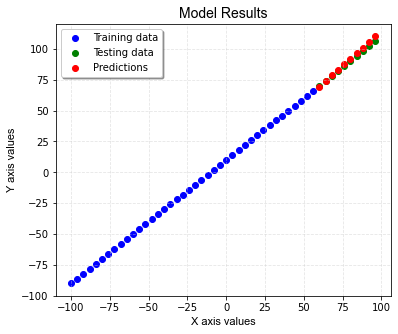

In [24]:
# Make and plot predictions for model_1
y_preds = model.predict(X_test)
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [32]:
# Calculate model metrics
mae_1 = np.round(float(mae(np.squeeze(y_test), np.squeeze(y_preds))), 2)
mse_1 = np.round(float(mse(np.squeeze(y_test), np.squeeze(y_preds))), 2)
print(f'\nMean Absolute Error = {mae_1}, Mean Squared Error = {mse_1}.')


Mean Absolute Error = 1.91, Mean Squared Error = 5.46.


In [35]:
# Calculate model metrics
mae_1 = np.round(float(mae(y_test.squeeze(), np.squeeze(y_preds))), 2)
mse_1 = np.round(float(mse(np.squeeze(y_test), np.squeeze(y_preds))), 2)
print(f'\nMean Absolute Error = {mae_1}, Mean Squared Error = {mse_1}.')


Mean Absolute Error = 1.91, Mean Squared Error = 5.46.


In [33]:
y_train.squeeze()

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])

In [34]:
y_train

array([[-90],
       [-86],
       [-82],
       [-78],
       [-74],
       [-70],
       [-66],
       [-62],
       [-58],
       [-54],
       [-50],
       [-46],
       [-42],
       [-38],
       [-34],
       [-30],
       [-26],
       [-22],
       [-18],
       [-14],
       [-10],
       [ -6],
       [ -2],
       [  2],
       [  6],
       [ 10],
       [ 14],
       [ 18],
       [ 22],
       [ 26],
       [ 30],
       [ 34],
       [ 38],
       [ 42],
       [ 46],
       [ 50],
       [ 54],
       [ 58],
       [ 62],
       [ 66]])

In [ ]:
mae_1 = np.round(float(mae(y_test, y_preds.squeeze()).numpy()), 2)
mse_1 = np.round(float(mse(y_test, y_preds.squeeze()).numpy()), 2)
print(f'\nMean Absolute Error = {mae_1}, Mean Squared Error = {mse_1}.')

In [ ]:
# Make and plot predictions for model_1
y_preds = model.predict(X_test)
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)
# Calculate model_1 metrics
mae_1 = np.round(float(mae(y_test, y_preds.squeeze()).numpy()), 2)
mse_1 = np.round(float(mse(y_test, y_preds.squeeze()).numpy()), 2)
print(f'\nMean Absolute Error = {mae_1}, Mean Squared Error = {mse_1}.')
# Write metrics to file
with open('metrics.txt', 'w') as outfile:
    outfile.write(f'\nMean Absolute Error = {mae_1}, Mean Squared Error = {mse_1}.')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.40)